#**IMPORTING THE FRAMEWORKS AND TOOLS**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
%matplotlib inline

In [93]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [94]:
#this line of code is importing three classes from the sklearn (scikit-learn) library in Python. These classes are used for creating custom machine learning models and transformers.
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [95]:
#This line of code sets the random seed to 42 using the rnd.seed() function.
#Setting the random seed ensures that the sequence of random numbers generated by the code remains the same every time it's run
#making the code's behavior deterministic.

rnd.seed(42)

##**LOADING THE DATA**

In [96]:
data1 = pd.read_csv('/content/wfp_food_prices_mwi.csv')
data1.head(5)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1990-10-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,1.9,0.7162
2,1990-10-15,NaN,NaN,National Average,NaN,NaN,non-food,"Fuel (kerosene, paraffin)",L,actual,Retail,MWK,1.22,0.4599
3,1991-08-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,2.0,0.6893
4,1992-06-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,2.58,0.7097


In [97]:
# Drop row at position 0
data = data1.drop(data1.index[0])
data.head(5)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,1990-10-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,1.9,0.7162
2,1990-10-15,NaN,NaN,National Average,NaN,NaN,non-food,"Fuel (kerosene, paraffin)",L,actual,Retail,MWK,1.22,0.4599
3,1991-08-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,2.0,0.6893
4,1992-06-15,NaN,NaN,National Average,NaN,NaN,non-food,Fuel (diesel),L,actual,Retail,MWK,2.58,0.7097
5,1992-06-15,NaN,NaN,National Average,NaN,NaN,non-food,"Fuel (kerosene, paraffin)",L,actual,Retail,MWK,1.6,0.4402


In [98]:
data.dropna(inplace=True)

##converting the categorical values to float and data to datetime

In [99]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Convert 'price' column to float
data['price'] = pd.to_numeric(data['price'])

# Convert 'longitude' and 'latitude' columns to float
data['longitude'] = pd.to_numeric(data['longitude'])
data['latitude'] = pd.to_numeric(data['latitude'])
data['usdprice'] = pd.to_numeric(data['usdprice'])

# If there are any specific units that need conversion (e.g., from meters to kilometers),
# you would need to perform additional operations to convert the values accordingly.

# Example:
# Convert latitude and longitude from degrees to radians
data['longitude'] = data['longitude'].apply(math.radians)
data['latitude'] = data['latitude'].apply(math.radians)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32329 entries, 20 to 32668
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       32329 non-null  datetime64[ns]
 1   admin1     32329 non-null  object        
 2   admin2     32329 non-null  object        
 3   market     32329 non-null  object        
 4   latitude   32329 non-null  float64       
 5   longitude  32329 non-null  float64       
 6   category   32329 non-null  object        
 7   commodity  32329 non-null  object        
 8   unit       32329 non-null  object        
 9   priceflag  32329 non-null  object        
 10  pricetype  32329 non-null  object        
 11  currency   32329 non-null  object        
 12  price      32329 non-null  float64       
 13  usdprice   32329 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 3.7+ MB


##SHOWS THAT ALL THE DATA IS CATEGORICAL,one of them is  Commodity Let's see what values it contain.

In [101]:
data['commodity'].value_counts()

commodity
Maize                      9124
Beans                      3586
Rice                       2607
Groundnuts (shelled)       1789
Cassava                    1196
Cowpeas                    1157
Maize (new harvest)         989
Pigeon peas                 884
Eggs                        304
Milling cost (maize)        303
Cabbage (chinese)           299
Water (drinking)            294
Charcoal                    290
Potatoes                    290
Firewood                    287
Onions                      286
Candles                     285
Oil (vegetable)             277
Mustard leaves              277
Battery lamp                277
Pumpkin leaves              276
Laundry soap                274
Fish (utaka)                273
Amaranthus                  272
Sugar                       271
Tomatoes (medium size)      270
Paracetamol                 267
Match box                   266
Bathing soap                264
Fertilizer (NPK)            264
Sweet potatoes              26

In [102]:
#The describe() function in pandas is used to generate descriptive statistics of a DataFrame (data)
data.describe()

,date,latitude,longitude,price,usdprice
count,32329,32329.000000,32329.000000,32329.000000,32329.000000
mean,2017-09-12 12:13:09.730582272,-0.248778,0.603173,1028.519756,1.337992
min,1998-01-15 00:00:00,-0.298860,0.574213,5.000000,0.006900
25%,2014-04-15 00:00:00,-0.274377,0.591085,82.700000,0.179500
50%,2019-12-15 00:00:00,-0.255109,0.604466,252.200000,0.386400
75%,2021-02-15 00:00:00,-0.233292,0.614854,613.800000,0.945700
max,2024-02-15 00:00:00,-0.167034,0.626089,240000.000000,314.672000
std,NaN,0.032018,0.013491,3761.644361,4.803038


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'usdprice'}>, <Axes: >]], dtype=object)

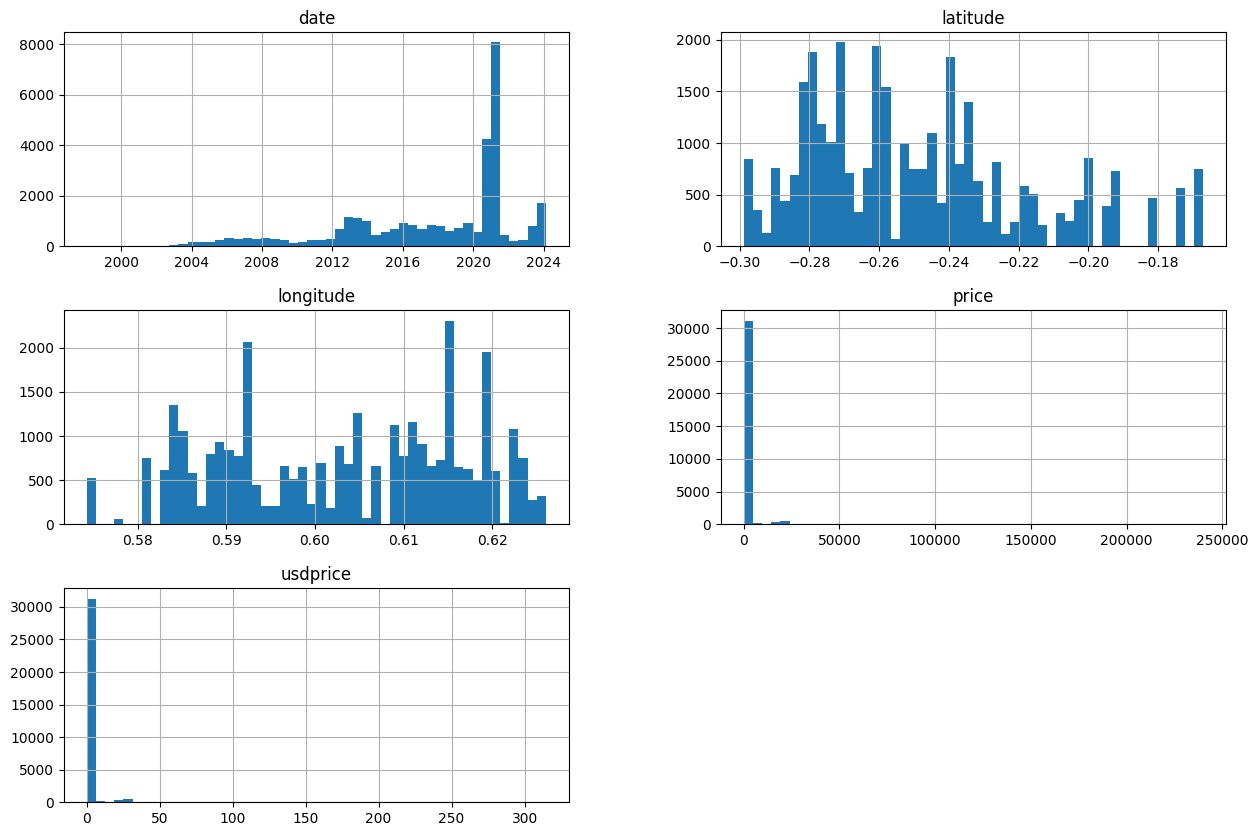

In [103]:
#This line of code creates histograms for each numeric column in the DataFrame data. The hist() function in pandas is used to create histograms,
#and by specifying bins=50, it divides the range of values into 50 equal-width bins.
#The figsize=(15,10) parameter adjusts the size of the resulting figure to be 15 inches wide and 10 inches tall.
data.hist(bins=50,figsize=(15,10))

#**GETTING THE DATASET**



*  Used Stratified sampling technique
*  Defined a new feature price_cat which is income category and used if for sampling




In [104]:
data['price_cat']=np.ceil(data['price']/1.5)
data['price_cat'].where(data['price_cat']<5,5.0,inplace=True)

In [105]:
# Convert 'income_cat' column to categorical data type
data['price_cat'] = pd.Categorical(data['price_cat'])

# Identify classes with low frequencies
class_counts = data['price_cat'].value_counts()
low_frequency_classes = class_counts[class_counts < 2].index.tolist()

# Combine low frequency classes into a single class
data['price_cat'] = data['price_cat'].replace(low_frequency_classes, 'Other')

# Check the updated distribution of classes
print(data['price_cat'].value_counts())


price_cat
5.0      32328
Other        1
Name: count, dtype: int64


In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

this code is creating a stratified split of the dataset into training and testing sets, ensuring that the distribution of categories in the 'income_cat' column is similar in both sets. This is important for training and evaluating machine learning models to ensure that they generalize well to unseen data.

In [113]:
# Check the indices generated by StratifiedShuffleSplit
print("Train indices:", train_index)
print("Test indices:", test_index)

# Check if the DataFrame contains any data
print("Data empty?", data.empty)

# Verify column names
print("Column names in data:", data.columns)
print("Is 'price_cat' in columns?", 'price_cat' in data.columns)

# Reset DataFrame index if needed
# data.reset_index(inplace=True)

# Check for duplicate indices
print("Duplicates in data:", data.index.duplicated().any())


Train indices: [13706  7498 23988 ...  3843 26826  3295]
Test indices: [31342   235 16193 ...  5432 28138 10674]
Data empty? False
Column names in data: Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice', 'price_cat'],
      dtype='object')
Is 'price_cat' in columns? True
Duplicates in data: False


In [115]:
data.reset_index(drop=True, inplace=True)

In [116]:
#it's dividing the dataset into training and testing sets while ensuring that the proportion of different categories in the 'income_cat' column remains similar in both sets.

data['price_cat'] = pd.to_numeric(data['price_cat'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Drop rows with NaN values in 'income_cat' column
data.dropna(subset=['price_cat'], inplace=True)

# Now, perform the Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['price_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [117]:
strat_train_set.drop('price_cat',axis=1,inplace=True)
strat_test_set.drop('price_cat',axis=1,inplace=True)

#This operation is commonly done after the stratified shuffle split when the column used for stratification (in this case, 'income_cat') is no longer needed for training or testing the model.
#Removing this column ensures that the model does not learn any spurious patterns related to this variable during training.

In [118]:
strat_train_set.to_csv("strat_train_set.csv",index=False)
strat_test_set.to_csv("strat_test_set.csv",index=False)

#By saving the DataFrames to CSV files, you can store the data in a format that can be easily loaded into various tools and libraries for further analysis, visualization, or modeling.
#The index=False argument ensures that the CSV files do not include an additional column for DataFrame indices.

#**Exploratory Data Analysis**

In [119]:
data=pd.read_csv('strat_train_set.csv')
#data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.info()

Text(0.5, 1.0, 'Distribution of commodities')

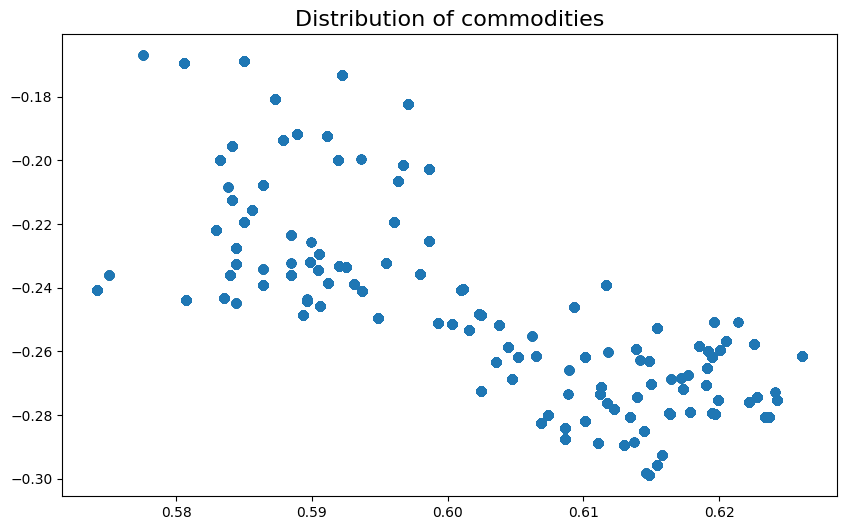

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.title("Distribution of commodities",size=16)

##By setting alpha=0.1, we can see high density areas. When alpha=0.1, the plotted elements (such as points or areas) are mostly transparent, making it easier to distinguish regions with high density because they will appear darker due to overlapping points.

Text(0.5, 1.0, 'Distribution of commodities')

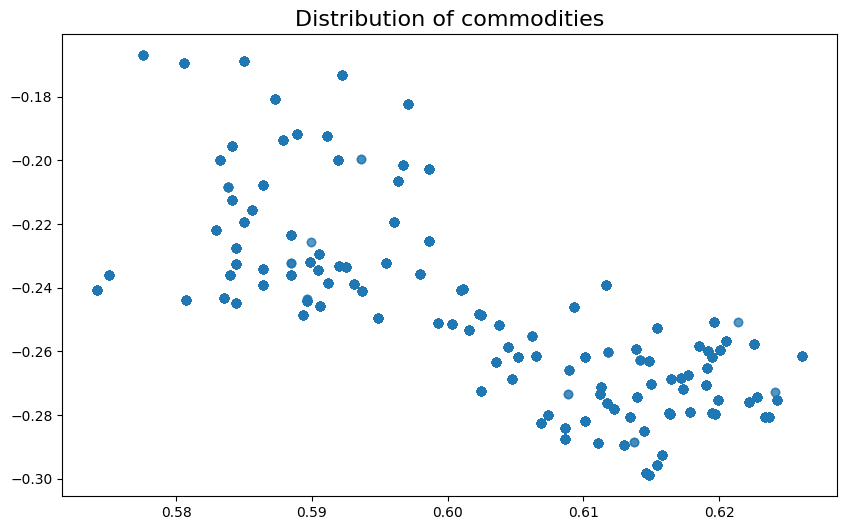

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.1)
plt.title("Distribution of commodities",size=16)

##**SELECTION OF FEATURES**

In [ ]:
selected_features = ['date', 'commodity', 'price', 'longitude', 'latitude', 'market']

# Filter the data based on selected features
filtered_data = df[selected_features]

# Filter the data to include only dates from 2023 to 2024
filtered_data = filtered_data[(df['date'] >= '2023-07-01') & (df['date'] <= '2024-02-31')]

# Define the specific commodities you want to include
specific_commodities = ['Maize (new harvest)', 'Beans','Cowpeas']  # Replace with your specific commodities

# Filter the data to include only the specific commodities
filtered_data = filtered_data[filtered_data['commodity'].isin(specific_commodities)]

# Display the filtered data
filtered_data

In [ ]:
df.columns

In [ ]:
df = df[['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice']]
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
# checking for duplicated rows

df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')




for col in df.columns:
    uniquevals(col)
    print("-"*75)

# Exploratory Data Analysis

In [ ]:
# viewing the distribution of the price column

sn.displot(filtered_data['price'],color='red')